<a href="https://colab.research.google.com/github/teena496/Data-Analyst-Capstone-Project/blob/main/Lab_14_Data_Visualization_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [ ]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-22 14:22:15--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  60.9MB/s    in 3.3s    

2025-04-22 14:22:19 (60.7 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [ ]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [ ]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [ ]:
QUERY = """
SELECT name as Table_Name
FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


(array([3.3616e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.e+00, 1.e+64, 2.e+64, 3.e+64, 4.e+64, 5.e+64, 6.e+64, 7.e+64,
        8.e+64, 9.e+64, 1.e+65]),
 <BarContainer object of 10 artists>)

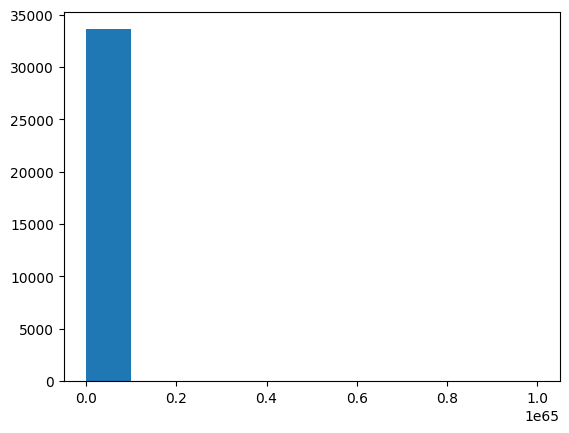

In [ ]:
## Write your code here
import numpy as np

QUERY = """
SELECT CompTotal, YearsCodePro
FROM main
"""
data = pd.read_sql_query(QUERY, conn)

df = pd.DataFrame(data)
df.fillna(np.nan)
df.dropna(inplace=True)
df

plt.hist(x=df['CompTotal'], bins=10)

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


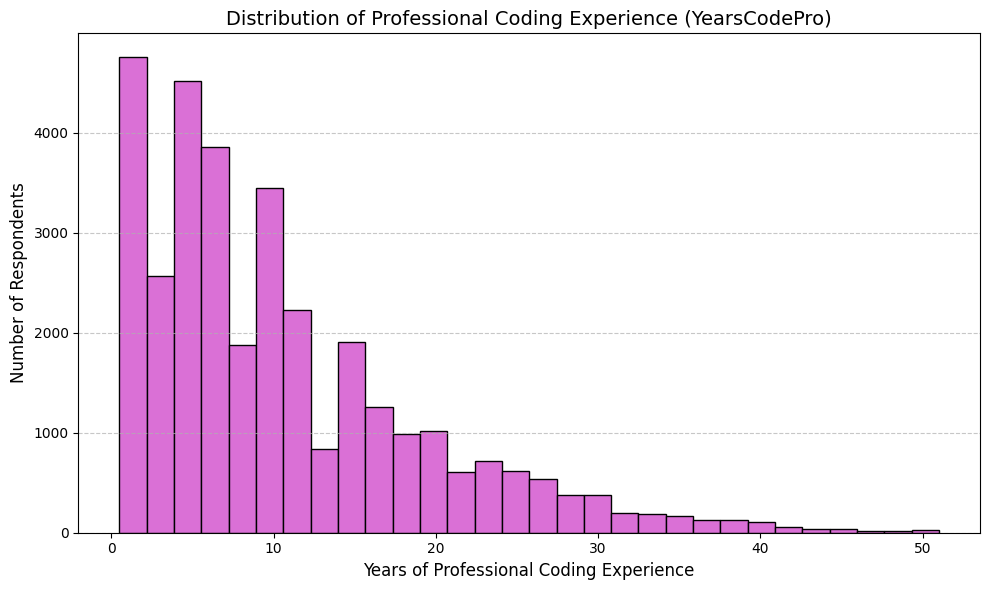

In [ ]:
## Write your code here
# Mapping strings to numeric values
years_map = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

df['YearsCodePro_numeric'] = df['YearsCodePro'].replace(years_map)
df['YearsCodePro_numeric'] = pd.to_numeric(df['YearsCodePro_numeric'], errors='coerce')  # Converts rest to float



import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['YearsCodePro_numeric'], bins=30, color='orchid', edgecolor='black')

plt.title('Distribution of Professional Coding Experience (YearsCodePro)', fontsize=14)
plt.xlabel('Years of Professional Coding Experience', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


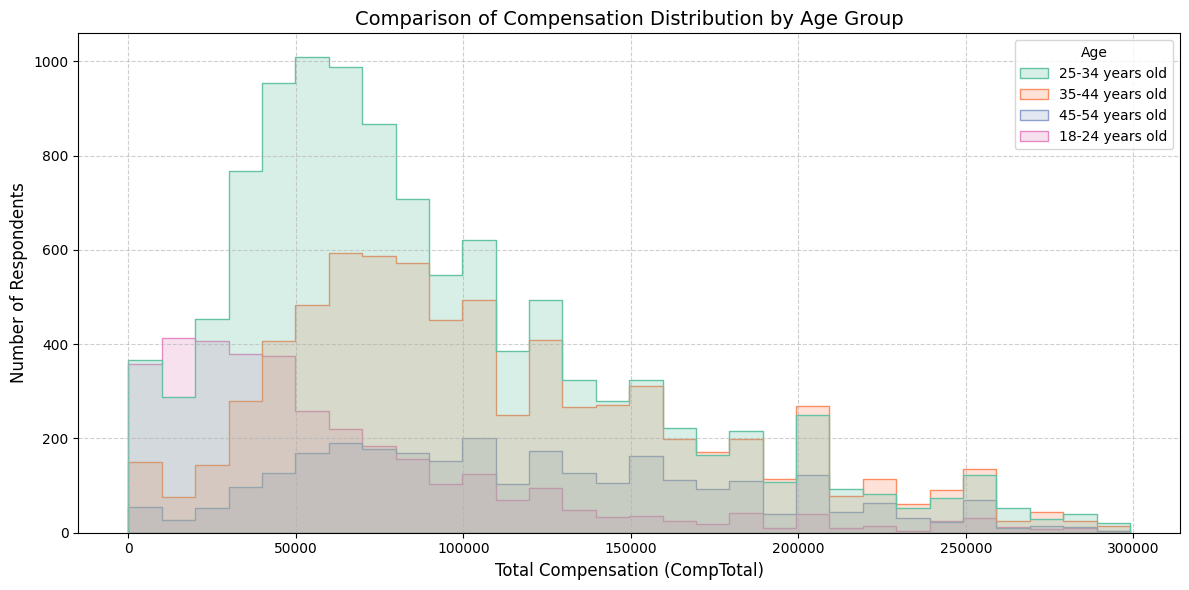

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df already contains 'Age' and 'CompTotal'
# Optional: Remove extreme values for clearer plots
df = df[df['CompTotal'] < 300000]  # filter outliers for better visualization

# Select common age groups (customize if needed)
selected_ages = ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old']
df_filtered = df[df['Age'].isin(selected_ages)]

# Plot: Overlaid Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df_filtered, x='CompTotal', hue='Age', bins=30, element='step', palette='Set2', common_norm=False)

plt.title('Comparison of Compensation Distribution by Age Group', fontsize=14)
plt.xlabel('Total Compensation (CompTotal)', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


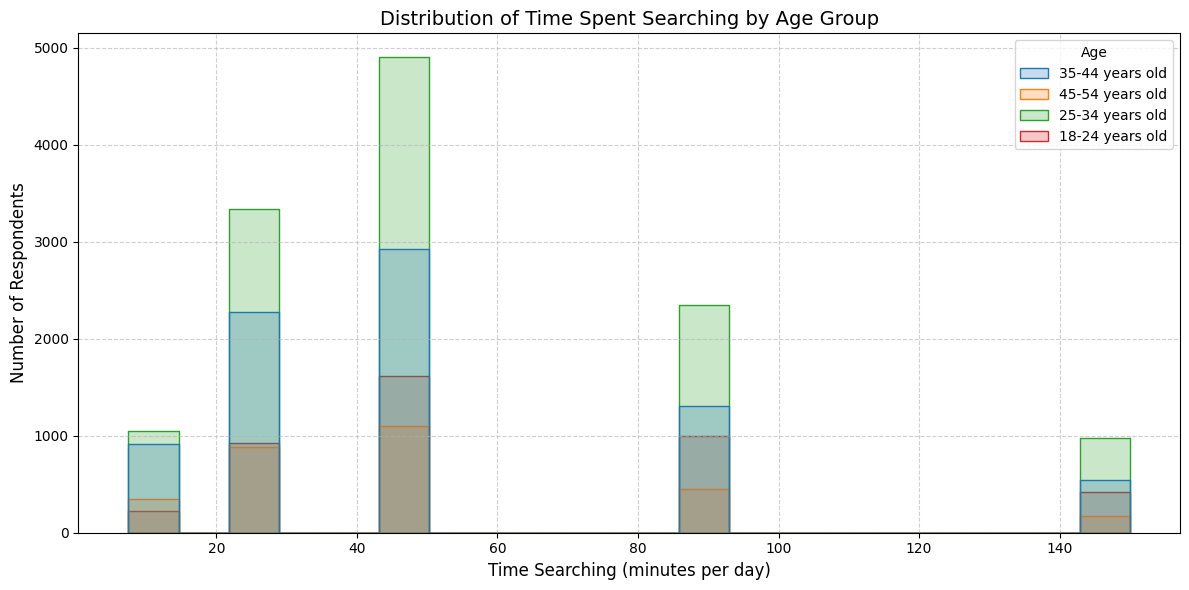

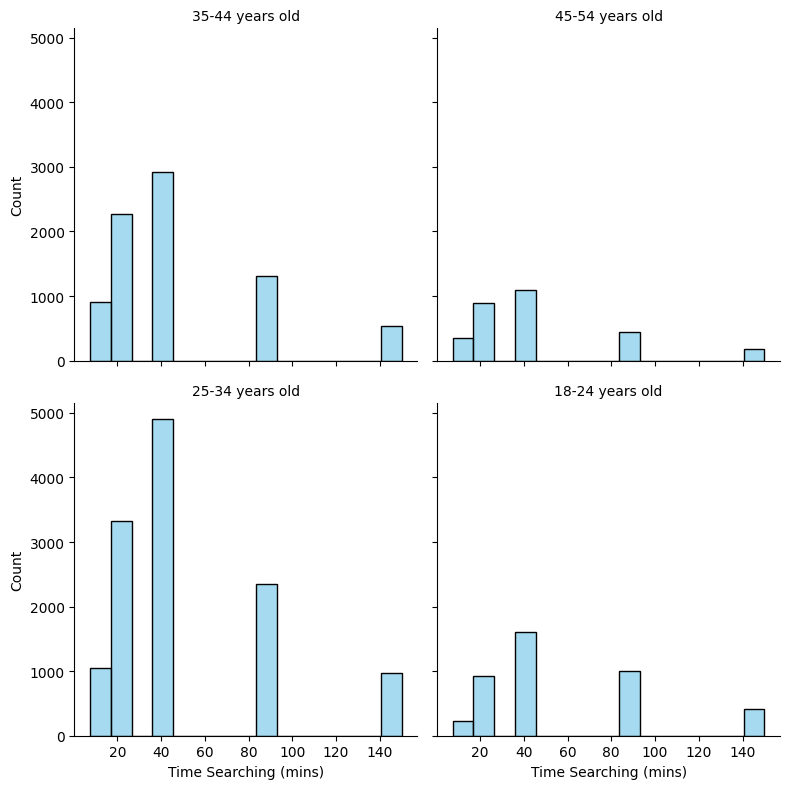

In [ ]:
## Write your code here
## Write your code here
import numpy as np

QUERY = """
SELECT TimeSearching, Age
FROM main
"""
data = pd.read_sql_query(QUERY, conn)

df = pd.DataFrame(data)
df.fillna(np.nan)
df.dropna(inplace=True)
df

time_map = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}

df['TimeSearching_numeric'] = df['TimeSearching'].map(time_map)

selected_ages = ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old']
df_filtered = df[df['Age'].isin(selected_ages)].dropna(subset=['TimeSearching_numeric'])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(data=df_filtered, x='TimeSearching_numeric', hue='Age',
             bins=20, element='step', palette='tab10', common_norm=False)

plt.title('Distribution of Time Spent Searching by Age Group', fontsize=14)
plt.xlabel('Time Searching (minutes per day)', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

g = sns.FacetGrid(df_filtered, col='Age', col_wrap=2, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x='TimeSearching_numeric', bins=15, color='skyblue')
g.set_axis_labels('Time Searching (mins)', 'Count')
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


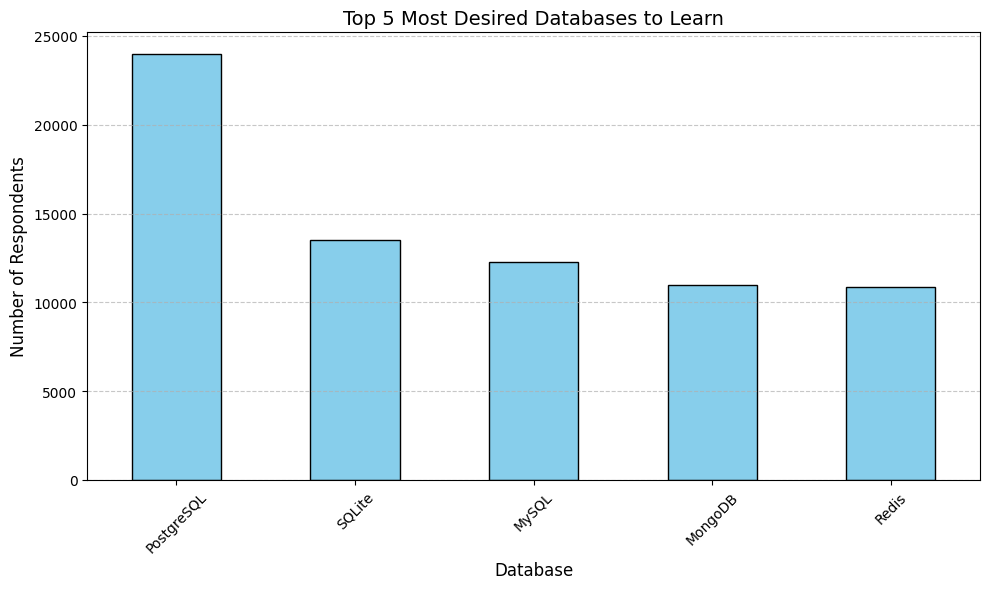

In [ ]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
"""
data = pd.read_sql_query(QUERY, conn)

df = pd.DataFrame(data)
df.fillna(np.nan)
df.dropna(inplace=True)
df
# Drop missing values
df_filtered = df[['DatabaseWantToWorkWith']].dropna()

# Split multiple databases and explode
df_filtered['DatabaseWantToWorkWith'] = df_filtered['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df_filtered.explode('DatabaseWantToWorkWith')

# Trim spaces
df_exploded['DatabaseWantToWorkWith'] = df_exploded['DatabaseWantToWorkWith'].str.strip()

# Count and get top 5
top_dbs = df_exploded['DatabaseWantToWorkWith'].value_counts().head(5)

plt.figure(figsize=(10, 6))
top_dbs.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 5 Most Desired Databases to Learn', fontsize=14)
plt.xlabel('Database', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


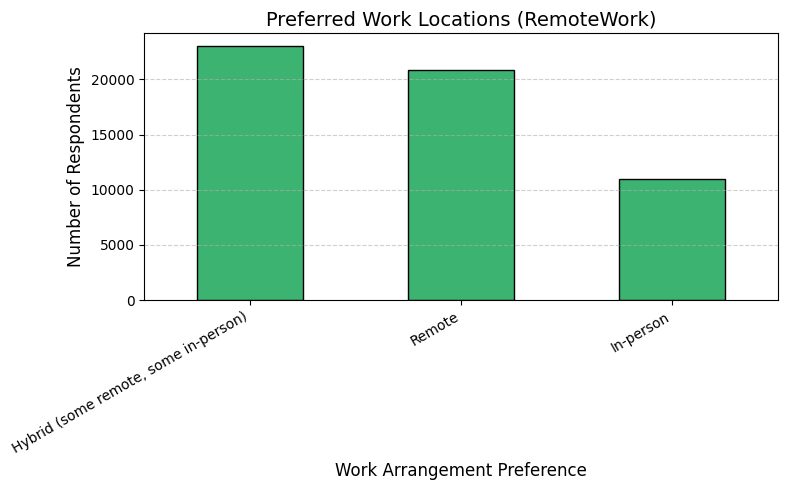

In [ ]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values
QUERY = """
SELECT RemoteWork
FROM main
"""
data = pd.read_sql_query(QUERY, conn)
df = pd.DataFrame(data)
remote_df = df[['RemoteWork']].dropna()

# Count the frequency of each work preference
remote_counts = remote_df['RemoteWork'].value_counts()

plt.figure(figsize=(8, 5))
remote_counts.plot(kind='bar', color='mediumseagreen', edgecolor='black')

plt.title('Preferred Work Locations (RemoteWork)', fontsize=14)
plt.xlabel('Work Arrangement Preference', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


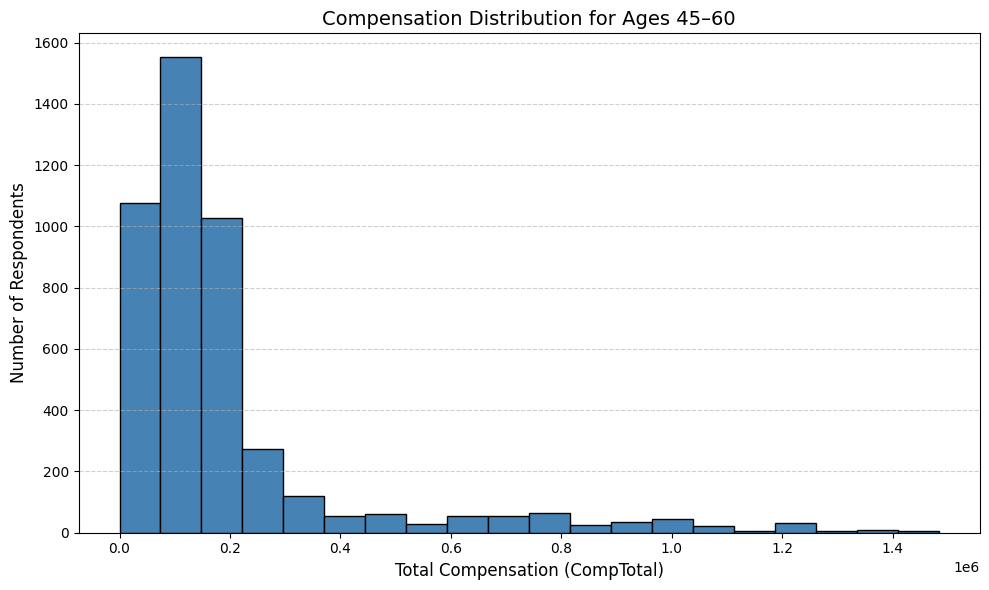

In [ ]:
## Write your code here

QUERY = """
SELECT Age,CompTotal from main
"""
data = pd.read_sql(QUERY, conn)
df = pd.DataFrame(data)
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

# Apply age mapping
df['Age_numeric'] = df['Age'].map(age_map)

# Filter ages 45 to 60
mid_career_df = df[(df['Age_numeric'] >= 45) & (df['Age_numeric'] <= 60)]

# Drop missing and extreme compensation values
mid_career_df = mid_career_df[['CompTotal']].dropna()
mid_career_df = mid_career_df[mid_career_df['CompTotal'] < mid_career_df['CompTotal'].quantile(0.95)]  # optional outlier removal

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(mid_career_df['CompTotal'], bins=20, color='steelblue', edgecolor='black')

plt.title('Compensation Distribution for Ages 45–60', fontsize=14)
plt.xlabel('Total Compensation (CompTotal)', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


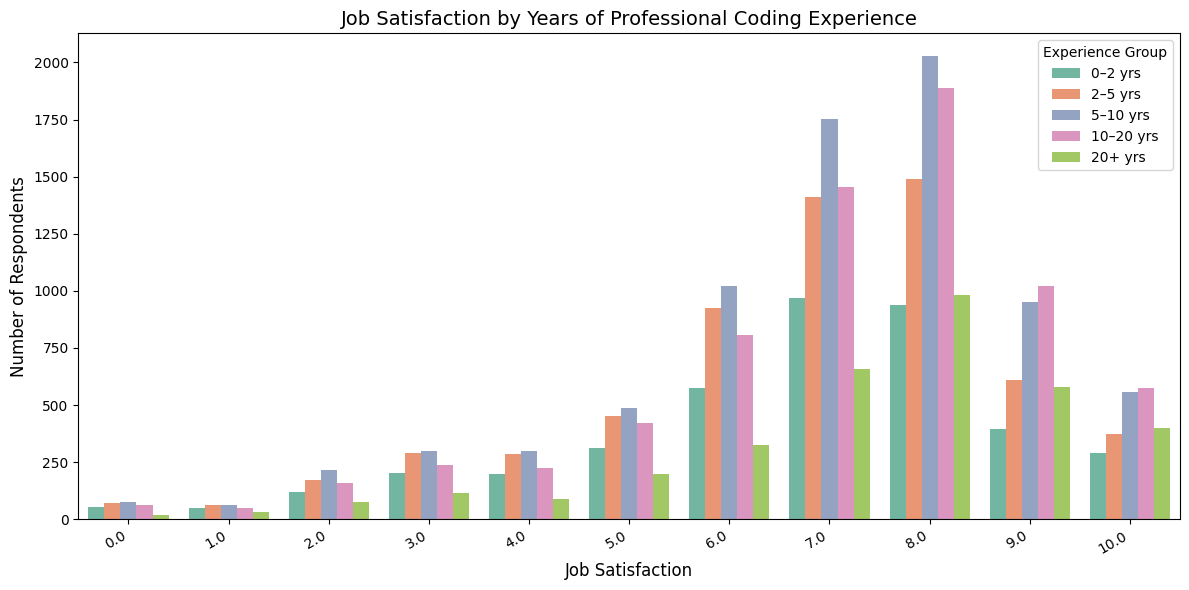

In [ ]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

QUERY = """
Select YearsCodePro, JobSat from main
"""
data = pd.read_sql(QUERY, conn)
df = pd.DataFrame(data)
# Drop missing values in required columns
job_sat_df = df[['YearsCodePro', 'JobSat']].dropna()

# Convert YearsCodePro to numeric (some values might be strings like 'Less than 1 year')
def convert_years(x):
    if x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 51
    try:
        return float(x)
    except:
        return None

job_sat_df['YearsCodePro_numeric'] = job_sat_df['YearsCodePro'].apply(convert_years)
job_sat_df.dropna(inplace=True)


bins = [0, 2, 5, 10, 20, 51]
labels = ['0–2 yrs', '2–5 yrs', '5–10 yrs', '10–20 yrs', '20+ yrs']
job_sat_df['ExperienceGroup'] = pd.cut(job_sat_df['YearsCodePro_numeric'], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))
sns.countplot(data=job_sat_df, x='JobSat', hue='ExperienceGroup', palette='Set2')

plt.title('Job Satisfaction by Years of Professional Coding Experience', fontsize=14)
plt.xlabel('Job Satisfaction', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title='Experience Group')
plt.tight_layout()
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
